# Logistic Regression from Scratch

Consider a straight line function, 

$ f_{(\vec w, b)} = \vec w \cdot \vec x + b$

Let, 

$ z = f_{\vec w, b}  =  \vec w \cdot \vec x + b $

Substuting $z$ into sigmoid function, we will get the logistic regression model

$ f_{(\vec w, b)} = g(\vec w \cdot \vec x + b)$ $= \frac{1}{1+ e^{-(\vec w \cdot \vec x + b)}} $


## How do we now choose the parameters $\vec w$ and $b$ ?


The $J(\vec w,b)$ for $ f_{\vec w,b} (\vec x) = \frac{1}{1 + e^{-(\vec w \cdot \vec x + b)} }$
is a non convex cost funciton and has a lot of local minima.

Therefore, we cannot use the cost function.

###  Loss Function for Logistic Regression is:

$$
L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) =
\begin{cases}
-\log(f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 1 \\
-\log(1 - f_{\vec{w}, b}(\vec{x}^{(i)})) & \text{if } y^{(i)} = 0
\end{cases}
$$

Where, 


$$
f_{\vec{w}, b}(\vec{x}) = \frac{1}{1 + e^{-(w \cdot x + b)}}
$$

### Now, let us simplying this loss function so that impementation is simpler when using gradient descent.

$ L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) = -y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)}))- (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)})) $


## Simplified Cost Function

$J(\vec w, b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$


## Gradient Descent for Logistic Regression

repeat until convergence {

$ w_j = w_j - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) x_j^{(i)}]$

$b = b - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) ] $







}

## Regularisation for Logistic Regression 

**Cost Function for Regularised Logistic Regression**

$J(\vec w, b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$

**Now the Gradient Descent Algorithm Changes to:**

 repeat until convergence {

$ w_j = w_j - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) x_j^{(i)}] + \frac{\lambda}{m} w_j$

$b = b - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) ] $








 }

### Code

In [8]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("./dataset/data.csv")

In [10]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [53]:
mean_columns = df.columns[2:14]
mean_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se'],
      dtype='object')

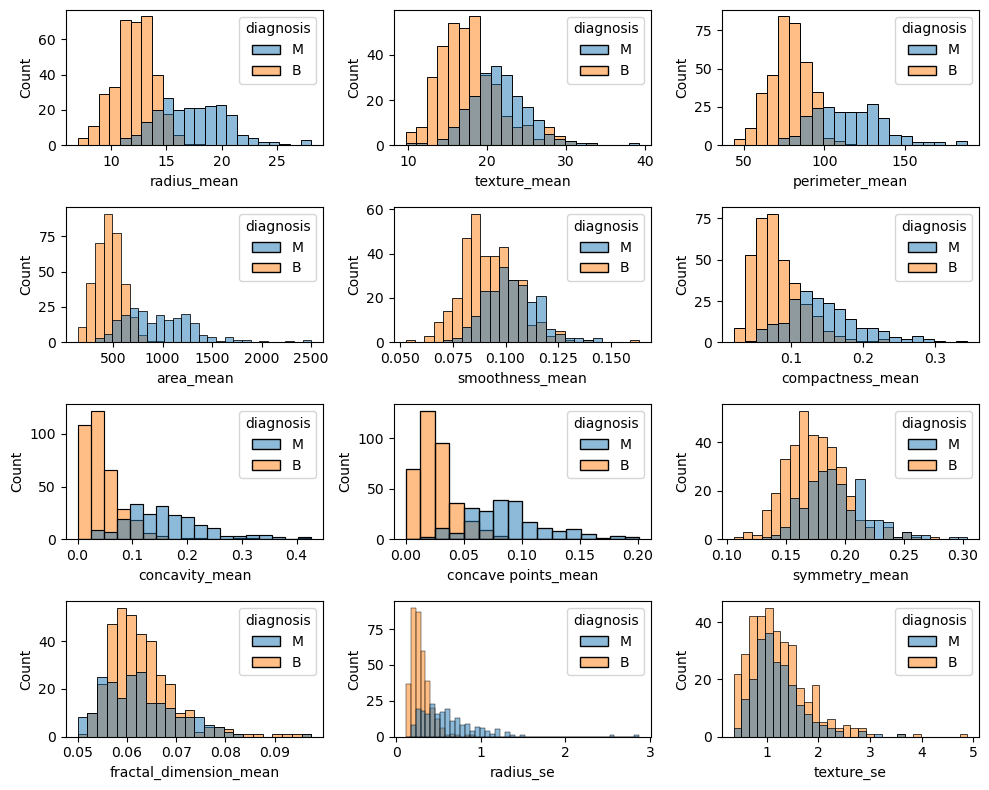

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(mean_columns):
    sns.histplot(df, x=col, hue='diagnosis', ax=axes[i])

plt.tight_layout()

## Data Preprocessing

In [56]:
# encoding the target label into 1/0

df['diagnosis'] = (df['diagnosis'] == "M").astype(int)

## Correlation Matrix

In [58]:
corr = df.corr()

<Axes: >

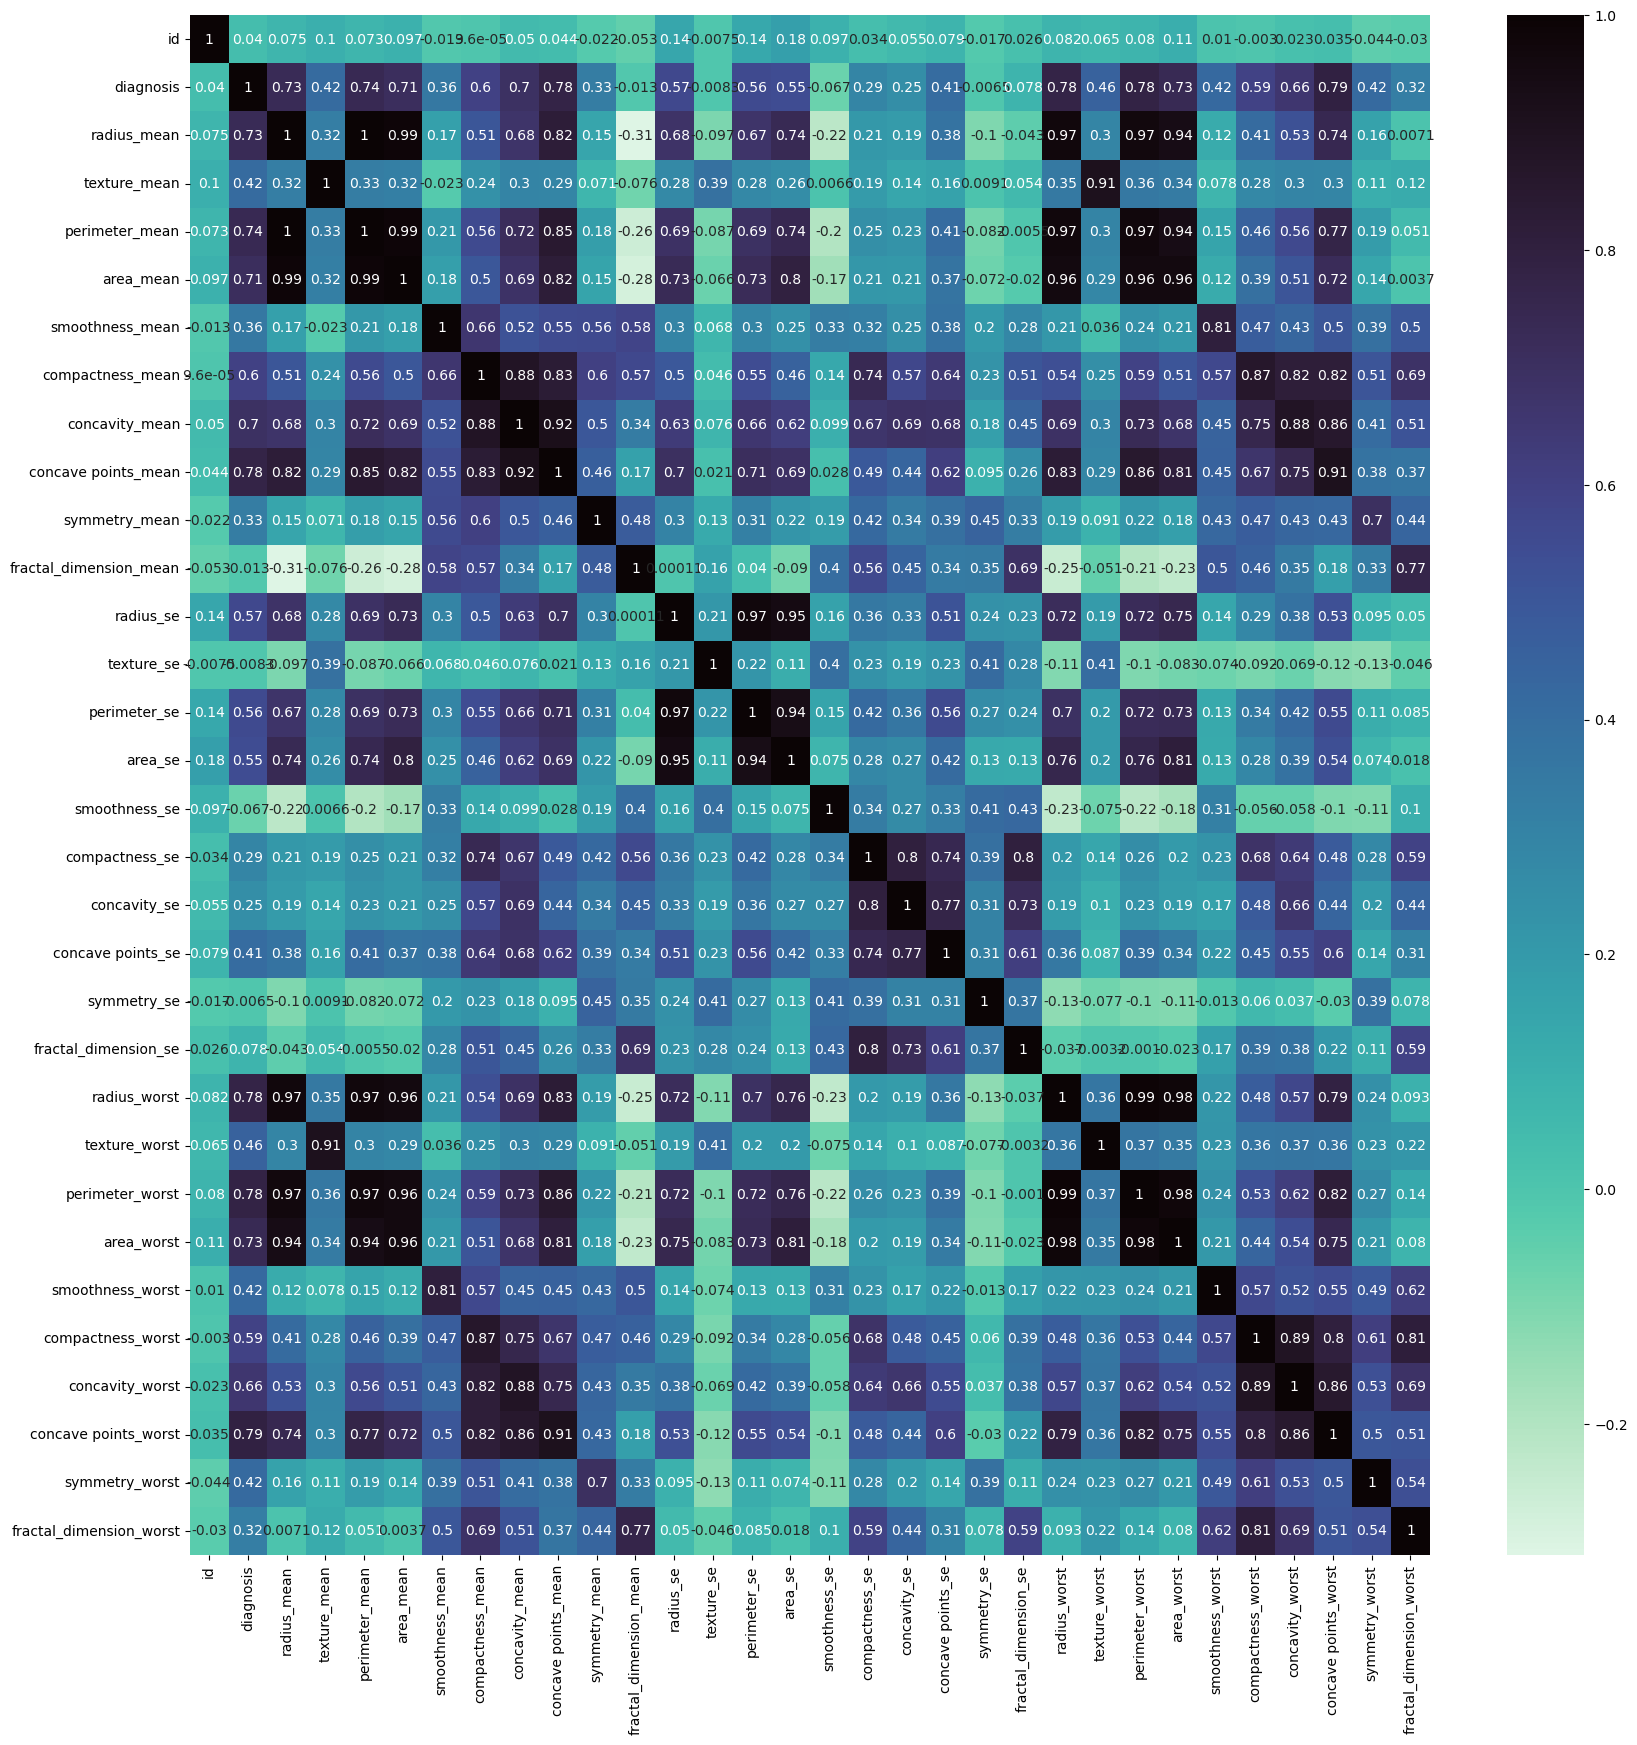

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r', annot=True)

Selecting features that are highly correlated with the target variable. Correlation threshold being 0.2

In [71]:
corr_index=np.where(corr['diagnosis'] > 0.2)

In [73]:
corr_index

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 17, 18, 19, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31]),)

In [81]:
# selecting features with correlation greater than 20% and removing the target variable from the list
features = corr['diagnosis'].index[corr_index].to_list()[1:]

In [82]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Split the data into X and y set


In [85]:
X = df[features].to_numpy()
y = df['diagnosis'].to_numpy()

In [86]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [87]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [96]:
def train_test_split(X, y, split_size=0.2, random_state=55):
    """
    Splits the dataset into training and testing sets.

    Parameters:
    X (array-like): Features of the dataset.
    y (array-like or Series): Target variable.
    split_size (float, optional): Proportion of the data to be used as test set (default is 0.2).
    random_state (int, optional): Seed for the random number generator (default is 55).

    Returns:
    tuple: X_train, X_test, y_train, y_test
        - X_train: Training features
        - X_test: Testing features
        - y_train: Training target
        - y_test: Testing target
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set random seed 
    np.random.seed(random_state)

    # Shuffle indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Calculate test size
    test_size = int(n_samples * split_size)

    # Split indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split data into train and test sets
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,split_size=0.2)

In [98]:
X_train.shape

(456, 25)

In [99]:
X_test.shape

(113, 25)

### Z-Score Normalisation

In [100]:
def normalise_data(X_train, X_test):
    """
    Normalizes the training and test data using z-score normalization.

    Parameters:
    X_train (numpy.ndarray): The training data to be normalized.
    X_test (numpy.ndarray): The test data to be normalized.

    Returns:
    tuple: The normalized training and test data.
    """
    # Calculate mean and standard deviation from the training data
    mu = np.mean(X_train, axis=0)
    sigma = np.std(X_train, axis=0)

    # Apply z-score normalization
    X_train_normalised = (X_train - mu) / sigma
    X_test_normalised = (X_test - mu) / sigma

    return X_train_normalised, X_test_normalised

In [101]:
X_train, X_test = normalise_data(X_train, X_test)

In [102]:
X_train

array([[-1.32133172,  2.07796138, -1.33452254, ..., -1.74926374,
        -0.67647434, -0.7749542 ],
       [ 0.94418949,  1.27105317,  0.98876317, ...,  1.19329024,
         0.71264478,  2.70239036],
       [-1.44455604, -1.15927751, -1.45715684, ..., -1.53403427,
         0.17887824, -0.32275319],
       ...,
       [ 0.14891201,  1.38392426,  0.21109255, ...,  0.1179177 ,
         0.50377961,  0.99106676],
       [-0.05500529, -1.43064842, -0.11663705, ..., -0.8502275 ,
        -0.09960865, -0.86972687],
       [ 3.92138208,  1.69131786,  4.06307826, ...,  2.31824769,
        -0.40130278, -0.52692059]])

### Model Building


In [103]:
def sigmoid(z):
    """
    Computes the sigmoid of z.

    Parameters:
    z (numpy.ndarray or float): The input value or array of values to which the sigmoid function is applied.

    Returns:
    numpy.ndarray or float: The sigmoid of the input.
    """
    calculated_sigmoid = 1 / (1 + np.exp(-z))
    return calculated_sigmoid

$J(\vec w, b) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} log(f_{\vec{w}, b}(\vec{x}^{(i)})) + (1-y^{(i)}) log(1-f_{\vec{w}, b}(\vec{x}^{(i)}))]$



## Gradient Descent for Logistic Regression

repeat until convergence {

$ w_j = w_j - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) x_j^{(i)}]$

$b = b - \alpha [\frac{1}{m}\sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)})- y^{(i)}) ] $







}

In [196]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001):
        self.learning_rate= learning_rate

    def initialise_parameter(self):
        self.W = np.zeros(self.X.shape[1])
        self.b = 0

    def forward_pass(self, X):
        z = np.matmul(X, self.W) + self.b
        activation_value = sigmoid(z)
        return activation_value

    def compute_cost(self, prediction):
        m = self.X.shape[0]
        cost = np.sum(self.y * np.log(prediction + 1e-8) + (1-self.y) * np.log(1- prediction + 1e-8))
        cost = -(cost/m)
        return cost

    def compute_gradient(self, prediction):
        m = self.X.shape[0]
        err = (prediction - self.y)
        self.dW = np.matmul(self.X.T, err) / m
        self.db = np.sum(err)/m

    def fit(self, X, y, iter, plot_cost=True):
        self.X = X
        self.y = y
        self.initialise_parameter()
        costs = []
        for i in range(iter):
            predictions = self.forward_pass(self.X)
            cost = self.compute_cost(predictions)
            costs.append(cost)

            self.compute_gradient(predictions)

            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            if i % 10000 == 0:
                print(f"The Cost after {i} iterations {cost}")

        if plot_cost:
            plt.plot([x for x in range(len(costs))], costs)
            plt.title("Change of Cost")
            plt.xlabel("Iterations")
            plt.ylabel("Cost")


    def predict(self, X):
        prediction = self.forward_pass(X)
        return np.round(prediction)


    def save_model(self, filename=None):
        if filename is not None:
            model_data = {
                'learning_rate': self.learning_rate,
                'W': self.W,
                'b': self.b
            }
            with open(filename, 'wb') as file:
                pickle.dump(model_data, file)
    @classmethod
    def load_model(cls, filename):
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        model = cls(model_data['learning_rate'])
        model.W = model_data['W']
        model.b = model_data['b']

        return model

The Cost after 0 iterations 0.6931471605599454
The Cost after 10000 iterations 0.2575479031212857
The Cost after 20000 iterations 0.1955931503152939
The Cost after 30000 iterations 0.16687002733967846
The Cost after 40000 iterations 0.1495266451680041
The Cost after 50000 iterations 0.13771205633318967
The Cost after 60000 iterations 0.12905783217303216
The Cost after 70000 iterations 0.12239415692360522
The Cost after 80000 iterations 0.11707172032688494
The Cost after 90000 iterations 0.11270000756217745


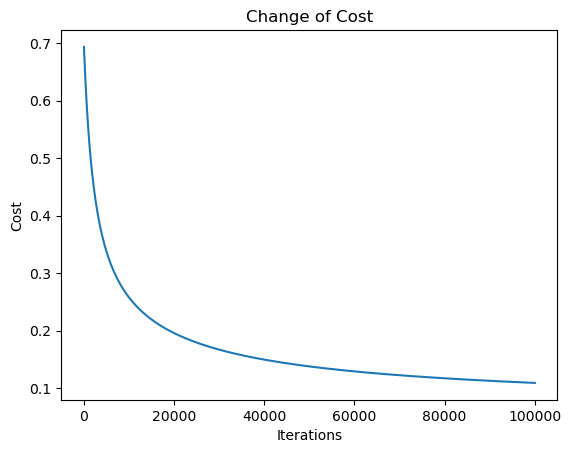

In [197]:
lg = LogisticRegression()
lg.fit(X_train, y_train,100000)

In [198]:
lg.save_model(filename='logisticmodel')

In [212]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        y_true = y_true.flatten()
        m = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return correct_predictions/m

    @staticmethod
    def precision(y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)


    staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

        
    

In [213]:
model = LogisticRegression.load_model(filename="logisticmodel")

In [214]:
y_pred = model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")


Accuracy: 97.35%
Precision: 96.00%
Recall: 97.96%
F1-Score: 96.97%
